In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

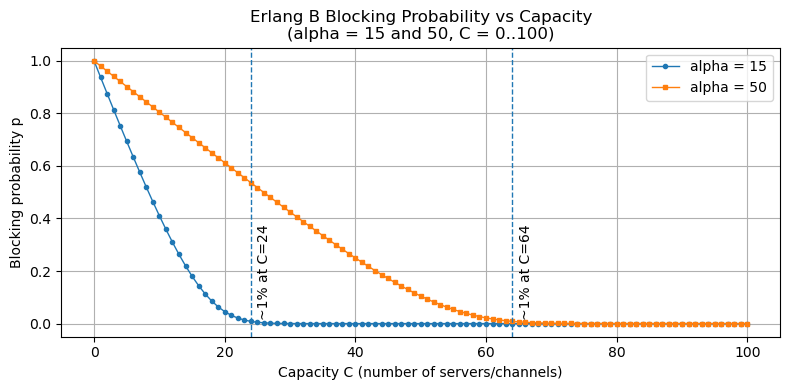

In [2]:
# Plot Erlang B for alpha=15 and alpha=50 together
# Run this as-is (requires: numpy, matplotlib, pandas)

def erlang_b(alpha: float, C: int) -> float:
    E = 1.0
    for c in range(1, C + 1):
        E = (alpha * E) / (c + alpha * E)
    return E

def threshold_capacity(alpha: float, target: float, Cmax: int = 500):
    """Small helper: the smallest C such that Erlang-B <= target."""
    for C in range(Cmax + 1):
        if erlang_b(alpha, C) <= target:
            return C, erlang_b(alpha, C)
    return None, None

C_values = list(range(0, 101))
p_alpha15 = [erlang_b(15.0, C) for C in C_values]
p_alpha50 = [erlang_b(50.0, C) for C in C_values]

# Approx positions where p <= 1%
C1_15, p1_15 = threshold_capacity(15.0, 0.01, 150)   # ~24
C1_50, p1_50 = threshold_capacity(50.0, 0.01, 300)   # ~64

plt.figure(figsize=(8,4))
plt.plot(C_values, p_alpha15, marker='o', markersize=3, linewidth=1, label='alpha = 15')
plt.plot(C_values, p_alpha50, marker='s', markersize=3, linewidth=1, label='alpha = 50')
if C1_15 is not None and C1_15 <= C_values[-1]:
    plt.axvline(C1_15, linestyle='--', linewidth=1)
    plt.text(C1_15+1, 0.012, f'~1% at C={C1_15}', rotation=90, va='bottom')
if C1_50 is not None and C1_50 <= C_values[-1]:
    plt.axvline(C1_50, linestyle='--', linewidth=1)
    plt.text(C1_50+1, 0.012, f'~1% at C={C1_50}', rotation=90, va='bottom')

plt.title("Erlang B Blocking Probability vs Capacity\n(alpha = 15 and 50, C = 0..100)")
plt.xlabel("Capacity C (number of servers/channels)")
plt.ylabel("Blocking probability p")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("erlangB_alpha15_50.pdf", dpi=600)
plt.show()

# # Optional: save artifacts
# pd.DataFrame({"C": C_values,
#               "p_block_alpha15": p_alpha15,
#               "p_block_alpha50": p_alpha50}).to_csv("erlangB_alpha15_50.csv", index=False)

